# Word2Vec  : Efficient Estimation of Word Representations in Vector Space

이 논문에서는 큰 데이터셋에서 단어의 연속 벡터 표현을 계산하기 위한 두가지 혁신적인 아키텍처를 제안하였습니다. (CBOW, Skip-gram)



이러한 표현의 품질은 단어 유사성 작업을 통해 측정 되며, 계산 비용과 정확도에 큰 개선을 하였습니다.



논문의 목표는 큰 데이터셋을 학습시켜 고품질의 단어 벡터를 학습시키고, 단어 표현의 유사성을 찾았다고한다.


.

신기하게도, 단어 표현의 유사성은 단순한 구문 규칙을 넘어서는 것으로 나타났습니다. 단어 벡터에 대해 단순한 대수 연산을 수행하는 단어 오프셋 기술을 사용하면, 예를 들어 vector("King") - vector("Man") + vector("Woman")은 단어 Queen의 벡터 표현에 가장 가까운 벡터를 얻는다는 것이 실험적으로 보여졌습니다


.

부연설명)

word2vec이 등장하기 이전에는 희소표현(sparse representation)에서 원핫 인코딩을 통해서 얻은 원핫 벡터를 표현하고자 단어의 인덱스의 값만 1이고, 나머지는 0으로 하는 표현법을 사용했었습니다.


분산 표현(distributed representation)을 제시하면서 벡터간 유의미한 유사성을 나타나기위해 다차원 공간에서 벡터화하는 방법을 제시하였습니다.



분산 표현(distributed representation) 방법은 기본적으로 분포 가설(distributional hypothesis)이라는 가정 하에 만들어진 표현 방법입니다.



이 가정은 '비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다' 라는 가정입니다.비슷한 텍스트의 단어들을 벡터화한다면 해당 단어 벡터들은 유사한 벡터값을 가집니다.





# Model Architectures
논문에서는 계산 복잡도를 최소화하기위한 설명이 많이있고 구조적인 설명은 wikidocs에서 가져왔습니다.

## CBOW(contiunous Bag of Word)

https://wikidocs.net/22660 자세한 설명

CBOW는 중심 단어를 예측하기 위해 주변 단어들을 입력으로 사용하는 방식입니다.

CBOW는 윈도우(window) 크기를 설정하여 주변 단어를 선택하고, 예측하려는 중심 단어와 함께 학습 데이터셋을 구성합니다.

 CBOW의 신경망은 은닉층이 하나인 얕은 신경망으로, 입력층에서 주변 단어의 원-핫 벡터와 가중치를 곱한 후 투사층에서 평균 벡터를 구하고, 두 번째 가중치와 곱하여 스코어 벡터를 생성합니다.

 이후 소프트맥스 함수를 통해 각 단어가 중심 단어일 확률을 예측하고, 크로스 엔트로피 손실 함수를 사용하여 학습합니다.

 CBOW는 역전파를 통해 가중치를 학습하고, 학습이 완료되면 가중치를 임베딩 벡터로 사용합니다.

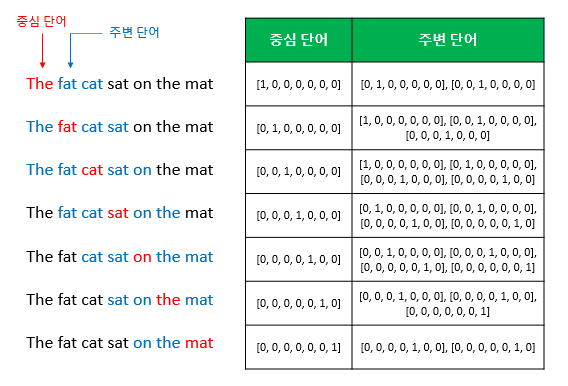

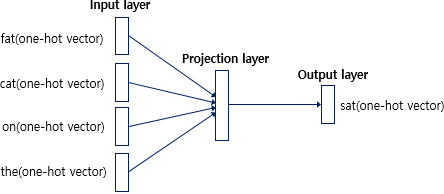

입력층에서 주변 단어의 원-핫 벡터와 가중치를 곱한 후 투사층에서 평균 벡터를 구하고, 두 번째 가중치와 곱하여 스코어 벡터를 생성합니다.

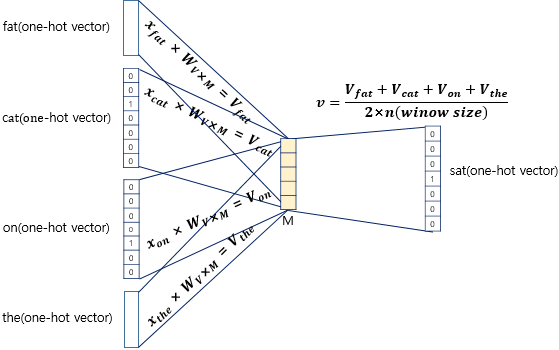

이후 소프트맥스 함수를 통해 각 단어가 중심 단어일 확률을 예측하고, 크로스 엔트로피 손실 함수를 사용하여 학습합니다.

 CBOW는 역전파를 통해 가중치를 학습하고, 학습이 완료되면 가중치를 임베딩 벡터로 사용합니다.

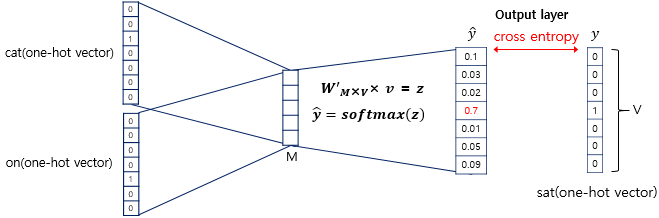

# Skip-gram

CBOW에서는 주변 단어를 통해 중심 단어를 예측했다면, Skip-gram은 중심 단어에서 주변 단어를 예측합니다. 앞서 언급한 예문에 대해서 동일하게 윈도우 크기가 2일 때, 데이터셋은 다음과 같이 구성됩니다.

CBOW와 유사하지만 input/output이 서로 뒤바뀐경우이다. 현재 word를 통해 이전, 이후의 word를 예측하는 model이다. 여러 word에 대해 prediction을 수행하기 때문에 당연하게도 연산량은 CBOW에 비해 많다. 하지만 skip-gram은 input word vector를 평균내지 않고 온전히 사용하기 때문에 등장 빈도가 낮은 word들에 대해 CBOW 대비 train 효과가 크다는 장점이 있다. CBOW에서는 각 word vector들을 평균내서 사용하기 때문에 등장 빈도가 낮은 word들은 제대로 된 학습을 기대하기 힘들다.

중심 단어에 대해서 주변 단어를 예측하므로 투사층에서 벡터들의 평균을 구하는 과정은 없습니다. 여러 논문에서 성능 비교를 진행했을 때 전반적으로 Skip-gram이 CBOW보다 성능이 좋다고 알려져 있습니다.

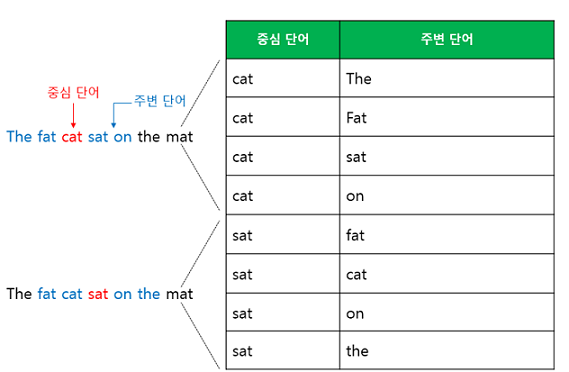

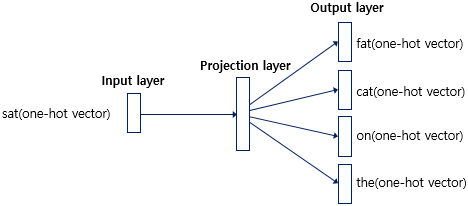

# 결과

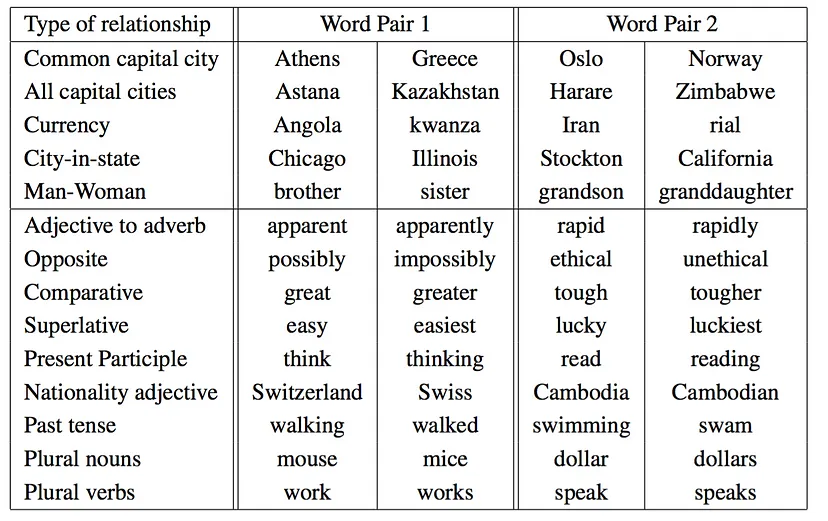

 단어 벡터의 간단한 산술 연산을 통해 해결할 수 있다. 예를 들어, "biggest" 벡터에서 "big" 벡터를 빼고 "small" 벡터를 더하는 식인 X = vector("biggest") - vector("big") + vector("small")을 계산하면 된다. 그런 다음, 벡터 공간에서 cosine 거리에 의해 가장 가까운 단어를 찾으면 그것이 답변이 된다. 우리의 단어 벡터가 잘 훈련되었다면 정확한 단어를 찾을 수 있다. 마지막으로, 많은 데이터를 사용하여 고차원의 단어 벡터를 학습하면 결과 벡터는 의미적인 관계를 답변하는 데 사용될 수 있음을 알 수 있다.

이 연구에서는 60억 단어로 구성된 말뭉치를 사용했습니다.

많은 데이터와 높은 차원의 단어 벡터를 사용하는 것이 정확도를 높일 것으로 예상되는 제한 최적화 문제를 다루었습니다. 우리는 가장 많이 사용되는 3만 개의 단어로 어휘를 제한하고 일부 학습 데이터를 사용하여 모델을 평가했습니다.

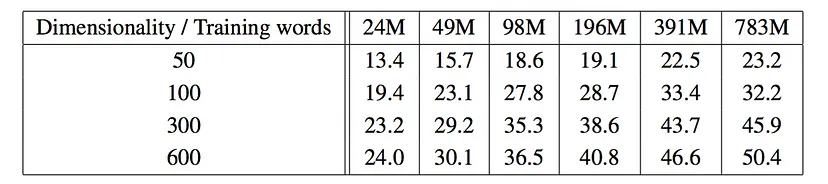

CBOW 구조를 테스트하면서 단어 벡터의 차원과 훈련 데이터의 크기를 증가시켰고, 향상되는 정도를 확인했습니다. 이를 통해 벡터의 차원과 데이터의 양을 동시에 증가시켜야 한다는 결론을 얻을 수 있었습니다.

또한, 훈련 데이터의 양을 두 배로 늘렸을 때 벡터 크기를 두 배로 늘린 것과 동일한 계산 복잡도 증가를 보였습니다.

마지막으로, 학습 주기에서 학습률을 0.025로 설정하고 선형적으로 감소시켰으며, 마지막 주기에서는 0에 근접하게 되었습니다.

모델 구조의 비교
생략

# 실습코드

https://wikidocs.net/50739

In [5]:
import re
import urllib.request
import zipfile
import nltk
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7fa12f71e650>)

In [6]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
nltk.download('punkt')
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [8]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)


['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.

window = 컨텍스트 윈도우 크기

min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)

workers = 학습을 위한 프로세스 수

sg = 0은 CBOW, 1은 Skip-gram.

In [9]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)


In [10]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8383098244667053), ('guy', 0.8053497672080994), ('lady', 0.7515957355499268), ('boy', 0.7493435740470886), ('girl', 0.7481878399848938), ('soldier', 0.7314926981925964), ('kid', 0.7137945294380188), ('gentleman', 0.7135982513427734), ('poet', 0.6765336990356445), ('surgeon', 0.6763986945152283)]


## 준비하면서 느낀점

최신 논문들을 보고 싶었으나, 간단히 보고 넘어가는 것이 아닌 리뷰를 위해서 준비하는 것은 힘들어서 과거에 중요한 논문 부터 보기로 하였고, 이번에 고른 것은 Word2Vec의 기초가되는 논문이였습니다.

지금은 단어를 넘어서 문장을 임베딩으로 구현하려는 노력이 많이 나타나고 있고 10년이 지난 논문이지만 아직도 NLP 자연어처리에서 분류나 다른 태스크에서 대중적으로 많이 사용이되고 있는 점에서 대단하다고 생각하고 있습니다.


이 논문을 준비하면서 비교가되는 다른 과거 모델에 대해서 생략하고 계산 복잡도 부분에 대해서는 다루지 않았는데 이부분도 보면 좋을 것같습니다.


참조자료:
https://arxiv.org/pdf/1301.3781.pdf

https://wikidocs.net/22660

https://cpm0722.github.io/paper-review/efficient-estimation-of-word-representations-in-vector-space